# Lagrange Interpolation
---

GENERAL PROBLEM: Suppose we are given values of some function $f(x_1),\ldots,f(x_n)$, at the points $x_1,\ldots,x_n$. Using these data alone, we want to find a polynomial, $p(x)$, that passes through those points and thereby approximates the function.

IDEA: Construct a generic polynomial with undetermined coefficients related to the function and it derivates at various points (say, using Taylor series expansions about different points). Set up an algebraic system of equations for the undetermined coefficients in terms of the given data. Solve.

## Warm-Up: Linear Interpolation

Suppose we are given $f(x_1)$ and $f(x_2)$ at the points $x_1$ and $x_2$, respectively. We can easily find the unique line that passes through those points as follows. The slope of the line is

\begin{equation}
   \text{slope} = \frac{f_2 - f_1}{x_2 - x_1},
\end{equation}

where $f_i=f(x_i)$. The equation for the line can therefore be written

\begin{equation}
   p(x) = \frac{(f_2 - f_1)}{(x_2 - x_1)}x + p(0).
\end{equation}

Evaluating this at $x_1$ gives

\begin{equation}
   p(x_1) = f_1 = \frac{(f_2 - f_1)}{(x_2 - x_1)}x_1 + p(0).
\end{equation}

We now elimate $p(0)$ in terms of the given data. Solving for $p(0)$ gives

\begin{equation}
   p(0) = \frac{(x_2 f_1 - f_2 x_1)}{(x_2 - x_1)}.
\end{equation}

Plugging this back into the expression for $p(x)$ above gives

\end{equation}
   p(x) = \frac{(x - x_2)}{(x_1 - x_2)}f(x_1) + \frac{(x - x_1)}{(x_2 - x_1)}f(x_2).
\end{equation}

By inspection we see that $p(x_1)=f(x_1)$ and $p(x_2)=f(x_2)$, as required. The function $p(x)$ is therefore the unique line that passes through $f(x_1)$ and $f(x_2)$. This solution is the (first or n=1) Lagrange interpolating polynomial. In this case, the polynomial is just a line. We will generalize this procedure to higher-order polynomials below.

### Exercise 1. [Paper]
Re-derive the expression for $p(x)$ using $p(x_2)=f_2$ to eliminate $p(0)$, instead of $p(x_1)=f_1$, as was done above.

## Interpolating Function via Taylor Series

As an alternative to the above derivation, we may derive the same result from Taylor series considerations. The Taylor series expansions of $f(x)$ in the neighborhoods of $x_1$ and $x_2$ yields

\begin{align*}
   f(x_1) &= f(x) + (x_1 - x)f'(x) + \cdots \\
   f(x_2) &= f(x) + (x_2 - x)f'(x) + \cdots.
\end{align*}

Next, approximate $f(x)$ by the truncated polynomial $p(x)$, leading to

\begin{align*}
   f(x_1) &= f_1 = p(x) + (x_1 - x)p'(x)\\
   f(x_2) &= f_2 = p(x) + (x_2 - x)p'(x).
\end{align*}

This gives two equations in the two unknowns, $p(x)$ and $p'(x)$. Solving for $p'(x)$ gives

\begin{equation}
   p'(x) = \frac{(f_2 - f_1)}{(x_2 - x_1)},
\end{equation}

and then plugging back in to get $p(x)$ gives

\begin{equation}
   p(x) = \frac{(x - x_2)}{(x_1 - x_2)}f(x_1) + \frac{(x - x_1)}{(x_2 - x_1)}f(x_2).
\end{equation}

This gives the same interpolating function as above.

## Weight Functions

We can write the interpolating polynomial in terms of weight functions as follows

\begin{equation}
   p(x) = L_1(x)f(x_1) + L_2(x)f(x_2),
\end{equation}

where

\begin{equation}
   L_1(x) = \frac{(x - x_2)}{(x_1 - x_2)} 
   \quad\text{and}\quad 
   L_2(x) = \frac{(x - x_1)}{(x_2 - x_1)}.
\end{equation}

To see that $L_1(x)$ and $L_2(x)$ act as weight functions, consider their asyptotic behavior.

\begin{align*}
   &\text{as } x\rightarrow x_1: \quad L_1\rightarrow 1 \quad\text{and}\quad L_2\rightarrow 0 \\
   &\text{as } x\rightarrow x_2: \quad L_1\rightarrow 0 \quad\text{and}\quad L_2\rightarrow 1 \\
\end{align*}

As a result, $p(x_1)\rightarrow f_1$ and $p(x_2)\rightarrow f_2$.

### Exercise 2. [Coding]
Write a program that implements the linear interpolation scheme above, given two data points. Plot the interpolating line along with the given data. 

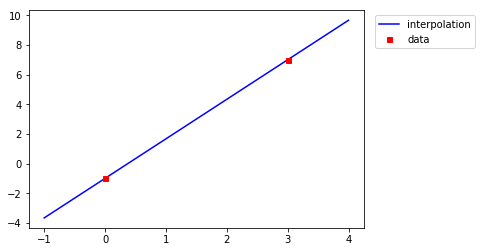

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interpLinear(x, xdata, fdata) :
    """ linear interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x1,x2], 1D array of grid points where function values are given
    fdata = [f1,f2], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """

    x1 = xdata[0]
    x2 = xdata[1]
    f1 = fdata[0]
    f2 = fdata[1]
    L1 = (x - x2)/(x1 - x2)
    L2 = (x - x1)/(x2 - x1)
    p = L1*f1 + L2*f2
    return p

data = np.array([[0,-1],[3,7]])
xdata = data[:,0]
ydata = data[:,1]

xmin = np.amin(xdata)
xmax = np.amax(xdata)

x = np.linspace(xmin-1,xmax+1,100)
y = interpLinear(x, xdata, ydata)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Quadratic Interpolation

Next suppose we are given $f(x_1)$, $f(x_2)$, and $f(x_3)$ at the points $x_1$, $x_2$, and $x_3$, respectively. The quadratic equation that passes through these three points can be parameterized as

\begin{equation}
   p(x) = a_0 + a_1 x + a_2 x^2,
\end{equation}

where $a_0$, $a_1$, and $a_2$ are undetermined coefficients. Evaluating $p(x)$ at $x_1$, $x_2$, and $x_3$ yields three equations in these undetermined coeffients

\begin{align*}
   p(x_1) &= a_0 + a_1 x_1 + a_2 x_1^2 \\
   p(x_2) &= a_0 + a_1 x_2 + a_2 x_2^2 \\
   p(x_3) &= a_0 + a_1 x_3 + a_2 x_3^2.
\end{align*}

Solving this system of equations and plugging the results back into the expression for $p(x)$ above gives

\begin{equation}
   p(x) = \frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)}f(x_1) 
   + \frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_2 - x_3)}f(x_2)
   + \frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)}f(x_3).
\end{equation}

By inspection we see that $p(x_1)=f(x_1)$, $p(x_2)=f(x_2)$, and $p(x_3)=f(x_3)$, as required. 

### Exercise 4. [Paper]
Verify the above expression for $p(x)$.

### Exercise 5. [Paper]
Re-derive the above expressions from the Taylor series approximations of $f(x)$ in the neighborhoods of $x_1$, $x_2$, and $x_3$.

### Exercise 6. [Paper]
Express $p(x)$ in terms of weight functions, and analyze the behavior of those functions in the neighborhoods of $x_1$, $x_2$, and $x_3$.

**Solution:**

\begin{equation}
   p(x) = L_1(x) f(x_1) + L_2(x) f(x_2) + L_3(x) f(x_3),
\end{equation}

where 

\begin{equation}
   L_1(x) = \frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)}
   \quad,\quad
   L_2(x) = \frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_2 - x_3)}
   \quad,\quad
   L_3(x) = \frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)}   
\end{equation}

with asymptotic properties

\begin{align*}
   &\text{as } x\rightarrow x_1: 
      \quad L_1\rightarrow 1 \quad,\quad L_2\rightarrow 0 \quad,\quad L_3\rightarrow 0\\
   &\text{as } x\rightarrow x_2: 
      \quad L_1\rightarrow 0 \quad,\quad L_2\rightarrow 1 \quad,\quad L_3\rightarrow 0\\
   &\text{as } x\rightarrow x_3: 
      \quad L_1\rightarrow 0 \quad,\quad L_2\rightarrow 0 \quad,\quad L_3\rightarrow 1\\
\end{align*}

As a result, $p(x_1)\rightarrow f_1$, $p(x_2)\rightarrow f_2$, and $p(x_3)\rightarrow f_3$.

### Exercise 7. [Coding]
Extend your linear interpolation program above to the case of quadratic interpolation, given three data points. Plot the interpolating function along with the given data. 

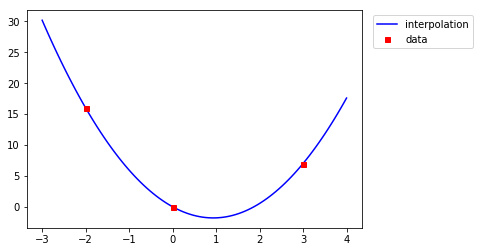

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interpQuad(x, xdata, fdata) :
    """ quadratic interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x1,x2,x3], 1D array of grid points where function values are given
    fdata = [f1,f2,f3], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """

    x1 = xdata[0]
    x2 = xdata[1]
    x3 = xdata[2]
    f1 = fdata[0]
    f2 = fdata[1]
    f3 = fdata[2]
    L1 = (x - x2)*(x - x3)/((x1 - x2)*(x1 - x3))
    L2 = (x - x3)*(x - x1)/((x2 - x3)*(x2 - x1))
    L3 = (x - x1)*(x - x2)/((x3 - x1)*(x3 - x2))
    p = L1*f1 + L2*f2 + L3*f3
    return p

data = np.array([[0,0],[3,7],[-2,16]])
xdata = data[:,0]
ydata = data[:,1]

xmin = np.amin(xdata)
xmax = np.amax(xdata)

x = np.linspace(xmin-1,xmax+1,100)
y = interpQuad(x, xdata, ydata)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Nth-Order Interpolating Polynomial

If $N+1$ data are given ($f(x_1),\ldots,f(x_{N+1})$) then the $N$th-order interpolating polynomial can be constructed using

\begin{equation}
   p(x) = L_1(x)f(x_1) + \cdots + L_{N+1}(x)f(x_{N+1})
   = \sum_{i=1}^{N+1} L_{i}(x) f(x_i),
\end{equation}

where 

\begin{equation}
   L^{(N)}_{i}(x) = \prod_{j=1, j\neq i}^{N}\frac{(x - x_j)}{(x_i - x_j)}.
\end{equation}

For example, for $N=4$ (cubic interpolation) and $i=3$:

\begin{equation}
   L^{(4)}_{3}(x) = \prod_{j=1, j\neq 3}^{4}\frac{(x - x_j)}{(x_3 - x_j)}
   = \frac{(x - x_1)(x - x_2)(x - x_4)}{(x_3 - x_1)(x_3 - x_2)(x_3 - x_4)}.
\end{equation}


### Exercise 8. [Paper]
Verify the above expression for $p(x)$ for the case of cubic interpolation ($N=4$).

### Exercise 9. [Coding]
Extend your quadratic interpolation program above to the general case.

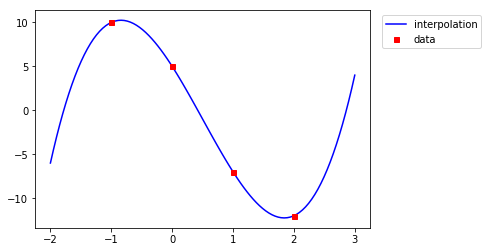

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interp(x, xdata, fdata) :
    """ interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x1,...,xN], 1D array of grid points where function values are given
    fdata = [f1,...,fN], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """
    
    # initialize interpolating function
    p = 0
        
    # loop to calculate basis functions
    for i in range(len(xdata)):
        numerator = 1   # initialize numerator
        denominator = 1 # initialize denominator
        for j in range(len(xdata)):
            if j!=i:
                numerator = numerator*(x - xdata[j])
                denominator = denominator*(xdata[i] - xdata[j])

        Li = numerator/denominator
        p = p + Li*fdata[i]
            
    return p

# enter input data 
data = np.array([[-1,10],[0,5],[1,-7],[2,-12]]) # <-- ENTER DATA HERE
xdata = data[:,0]
ydata = data[:,1]

# define x-grid
xmin = np.amin(xdata)
xmax = np.amax(xdata)
x = np.linspace(xmin-1, xmax+1, 100)

# get interpolating polynomial on grid
y = interp(x, xdata, ydata)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1), loc=2)
plt.show()

### Exercise 10. [Coding]
Using the tabulated values for the Bessel functions below, estimate $J_1(5.5)$ by linear, quadratic, and cubic interpolation. 

\begin{align*}
   J_1(0.0) &= 0.00000\,00000 \\
   J_1(1.0) &= 0.44005\,05857 \\
   J_1(2.0) &= 0.57672\,48078 \\
   J_1(3.0) &= 0.33905\,89585 \\
   J_1(4.0) &= -0.06604\,33280 \\
   J_1(5.0) &= -0.32757\,91376 \\
   J_1(6.0) &= -0.27668\,38581 \\
   J_1(7.0) &= -0.00468\,28235 \\
   J_1(8.0) &= 0.23463\,63469 \\
   J_1(9.0) &= 0.24531\,17866 \\
   J_1(10.0) &= 0.04347\,27462
\end{align*}


In [5]:
x = 5.5

J1 = np.zeros((11,2))
J1[0,:] = [0.0, 0.0000000000]
J1[1,:] = [1.0, 0.4400505857]
J1[2,:] = [2.0, 0.5767248078]
J1[3,:] = [3.0, 0.3390589585]
J1[4,:] = [4.0, -0.0660433280]
J1[5,:] = [5.0, -0.3275791376]
J1[6,:] = [6.0, -0.2766838581]
J1[7,:] = [7.0, -0.0046828235]
J1[8,:] = [8.0, 0.2346363469]
J1[9,:] = [9.0, 0.2453117866]
J1[10,:] = [10.0, 0.0434727462]

# linear interpolation
data_lin = np.array(J1[4:6,:])
xdata = data_lin[:,0]
ydata = data_lin[:,1]
lin = interp(x, xdata, ydata)

# quadratic interpolation (left-weighted)
data_quadL = np.array(J1[3:6,:])
xdata = data_quadL[:,0]
ydata = data_quadL[:,1]
quadL = interp(x, xdata, ydata)

# quadratic interpolation (right-weighted)
data_quadR = np.array(J1[4:7,:])
xdata = data_quadR[:,0]
ydata = data_quadR[:,1]
quadR = interp(x, xdata, ydata)

# cubic interpolation
data_cubic = np.array(J1[3:7,:])
xdata = data_cubic[:,0]
ydata = data_cubic[:,1]
cubic = interp(x, xdata, ydata)

# quintic interpolation
data_quint = np.array(J1[2:8,:])
xdata = data_quint[:,0]
ydata = data_quint[:,1]
quint = interp(x, xdata, ydata)

# heptic interpolation
data_hept = np.array(J1[1:10,:])
xdata = data_hept[:,0]
ydata = data_hept[:,1]
hept = interp(x, xdata, ydata)

# ninth-order interpolation
data_ninth = np.array(J1[:,:])
xdata = data_ninth[:,0]
ydata = data_ninth[:,1]
ninth = interp(x, xdata, ydata)

print("linear interpolation                     = ",lin)
print("quadratic interpolation (left-weighted)  = ",quadL)
print("quadratic interpolation (right-weighted) = ",quadR)
print("cubic interpolation                      = ",cubic)
print("quintic interpolation                    = ",quint)
print("heptic interpolation                     = ",hept)
print("ninth-order interpolation                = ",ninth)

linear interpolation                     =  -0.4583470424
quadratic interpolation (left-weighted)  =  -0.404509613563
quadratic interpolation (right-weighted) =  -0.341185383988
cubic interpolation                      =  -0.35173942225
quintic interpolation                    =  -0.342959170183
heptic interpolation                     =  -0.341449659433
ninth-order interpolation                =  -0.341440842728
